# EDA of Wine Data

Step 1. Load cleaned data into a data frames for each set of data.

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from data_cleaner import DataCleaner

In [6]:
input_folder = r"C:/Users/aidan/codeprojects/ML/ArduinoWineSniffer/ML/WineCSVs/AllWines"  # Path to the folder containing CSV files
output_file = "ML/WineCSVs/AllWines"  # Path where cleaned data will be saved

RawWineData = pd.DataFrame()

# Loop through all CSV files in the folder
for filename in os.listdir(input_folder):
    if filename.endswith(".csv"):
        print(f"Processing file: {filename}")
        file_path = os.path.join(input_folder, filename)
        df = pd.read_csv(file_path)

        # Append the cleaned data to the final dataframe
        RawWineData = pd.concat([RawWineData, df])

print(
    f"Data compiling complete. Rows in data: {len(RawWineData)}")

Processing file: BlackTie2309(25degEnvTemp).csv
Processing file: BlackTie2509(20degEnvTemp).csv
Processing file: BlackTie3009(20degEnvTemp).csv
Processing file: BlackTieR2_3009(20degEnvTemp).csv
Processing file: Moscato2309(25degEnvTemp).csv
Processing file: Moscato2509(20degEnvTemp).csv
Processing file: Moscato3009(20degEnvTemp).csv
Processing file: MoscatoR2_3009(20degEnvTemp).csv
Processing file: Namaqua2309(25degEnvTemp).csv
Processing file: Namaqua2509(20degEnvTemp).csv
Processing file: Namaqua3009(20degEnvTemp).csv
Processing file: NamaquaR2_3009(20degEnvTemp).csv
Processing file: SilverMyn2309(25degEnvTemp).csv
Processing file: SilverMyn2509(20degEnvTemp).csv
Processing file: SilverMyn3009(20degEnvTemp).csv
Processing file: SilvermynR2_3009(20degEnvTemp).csv
Processing file: SixWineData1609.csv
Processing file: Sophie2309(25degEnvTemp).csv
Processing file: Sophie2509(20degEnvTemp).csv
Processing file: Sophie3009(20degEnvTemp).csv
Processing file: SophieR2_3009(20degEnvTemp).csv


In [7]:
# Initialize the DataCleaner with folder path and output file
cleaner = DataCleaner(input_folder, cleaning_method='z_score')
cleanedData = cleaner.clean_data()  # Call the cleaning function

Processing file: BlackTie2309(25degEnvTemp).csv
Original number of rows: 577
Rows after dropping nulls: 577
Rows after removing NaNs from sensor columns: 576
Rows before: 576, Rows cleaned after Z-Score: 6
Total rows cleaned: 7
____________________
Processing file: BlackTie2509(20degEnvTemp).csv
Original number of rows: 566
Rows after dropping nulls: 566
Rows after removing NaNs from sensor columns: 563
Rows before: 563, Rows cleaned after Z-Score: 4
Total rows cleaned: 7
____________________
Processing file: BlackTie3009(20degEnvTemp).csv
Original number of rows: 10242
Rows after dropping nulls: 10240
Rows after removing NaNs from sensor columns: 10240
Rows before: 10240, Rows cleaned after Z-Score: 396
Total rows cleaned: 398
____________________
Processing file: BlackTieR2_3009(20degEnvTemp).csv
Original number of rows: 16332
Rows after dropping nulls: 16324
Rows after removing NaNs from sensor columns: 16323
Rows before: 16323, Rows cleaned after Z-Score: 662
Total rows cleaned: 67

c:\Users\aidan\codeprojects\ML\ArduinoWineSniffer\src\data_cleaner.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
c:\Users\aidan\codeprojects\ML\ArduinoWineSniffer\src\data_cleaner.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
c:\Users\aidan\codeprojects\ML\ArduinoWineSniffer\src\data_cleaner.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

____________________
Processing file: Namaqua3009(20degEnvTemp).csv
Original number of rows: 10892
Rows after dropping nulls: 10891
Rows after removing NaNs from sensor columns: 10891
Rows before: 10891, Rows cleaned after Z-Score: 355
Total rows cleaned: 356
____________________
Processing file: NamaquaR2_3009(20degEnvTemp).csv
Original number of rows: 10689
Rows after dropping nulls: 10688
Rows after removing NaNs from sensor columns: 10688
Rows before: 10688, Rows cleaned after Z-Score: 288
Total rows cleaned: 289
____________________
Processing file: SilverMyn2309(25degEnvTemp).csv
Original number of rows: 594
Rows after dropping nulls: 594
Rows after removing NaNs from sensor columns: 591
Rows before: 591, Rows cleaned after Z-Score: 4
Total rows cleaned: 7
____________________
Processing file: SilverMyn2509(20degEnvTemp).csv
Original number of rows: 567
Rows after dropping nulls: 567
Rows after removing NaNs from sensor columns: 566
Rows before: 566, Rows cleaned after Z-Score: 3

c:\Users\aidan\codeprojects\ML\ArduinoWineSniffer\src\data_cleaner.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
c:\Users\aidan\codeprojects\ML\ArduinoWineSniffer\src\data_cleaner.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
c:\Users\aidan\codeprojects\ML\ArduinoWineSniffer\src\data_cleaner.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

____________________
Processing file: Sophie2509(20degEnvTemp).csv
Original number of rows: 468
Rows after dropping nulls: 468
Rows after removing NaNs from sensor columns: 466
Rows before: 466, Rows cleaned after Z-Score: 19
Total rows cleaned: 21
____________________
Processing file: Sophie3009(20degEnvTemp).csv
Original number of rows: 10353
Rows after dropping nulls: 10351
Rows after removing NaNs from sensor columns: 10351
Rows before: 10351, Rows cleaned after Z-Score: 189
Total rows cleaned: 191
____________________
Processing file: SophieR2_3009(20degEnvTemp).csv
Original number of rows: 10432
Rows after dropping nulls: 10427
Rows after removing NaNs from sensor columns: 10426
Rows before: 10426, Rows cleaned after Z-Score: 589
Total rows cleaned: 595
____________________
Processing file: TallHorse2309(25degEnvTemp).csv
Original number of rows: 562
Rows after dropping nulls: 562
Rows after removing NaNs from sensor columns: 561
Rows before: 561, Rows cleaned after Z-Score: 3
To

c:\Users\aidan\codeprojects\ML\ArduinoWineSniffer\src\data_cleaner.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
c:\Users\aidan\codeprojects\ML\ArduinoWineSniffer\src\data_cleaner.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
c:\Users\aidan\codeprojects\ML\ArduinoWineSniffer\src\data_cleaner.py:83: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the 

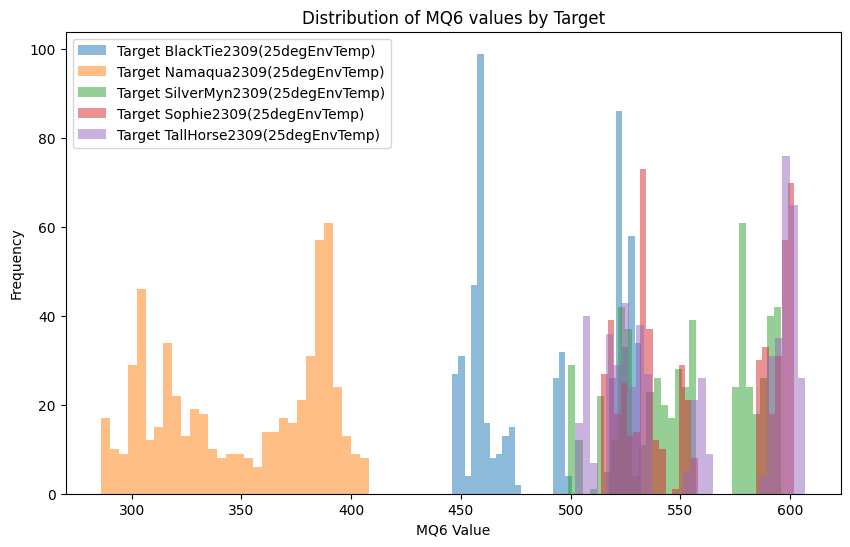

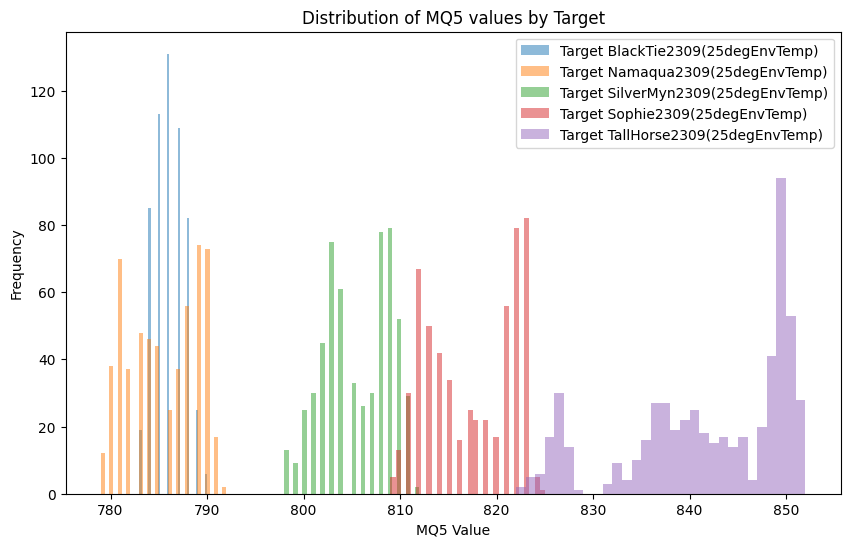

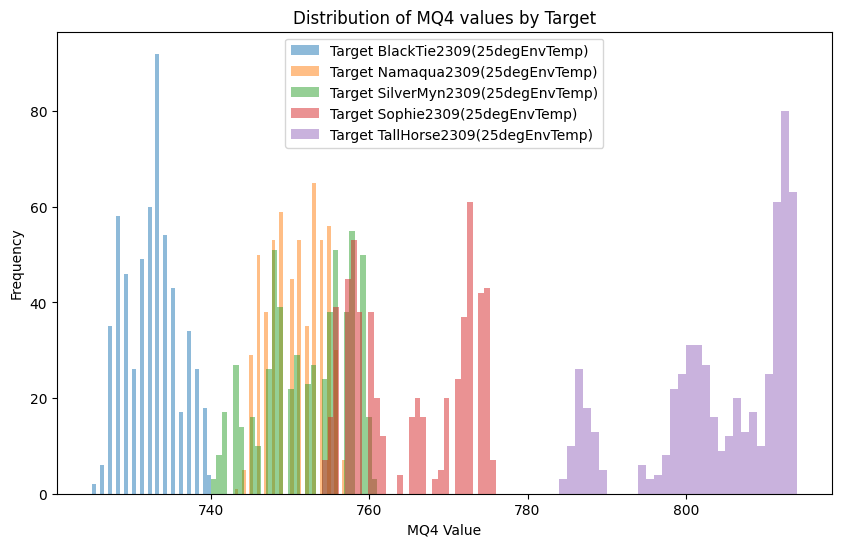

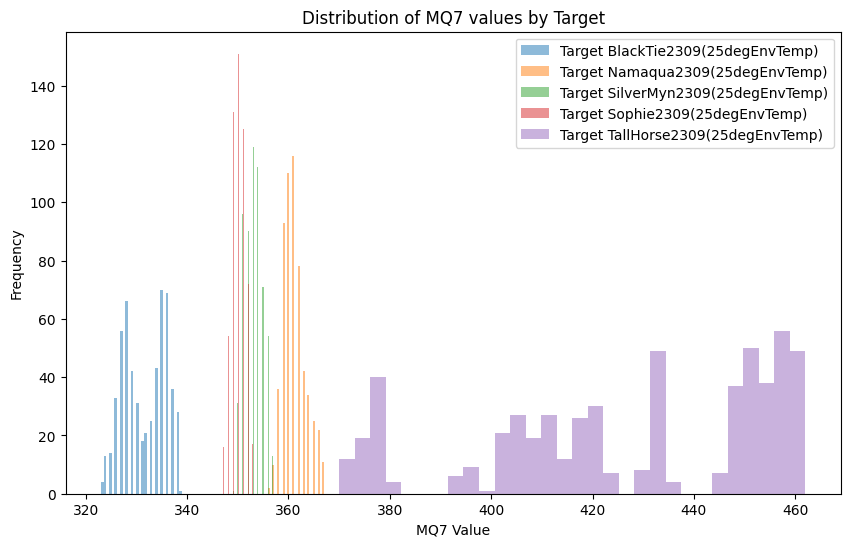

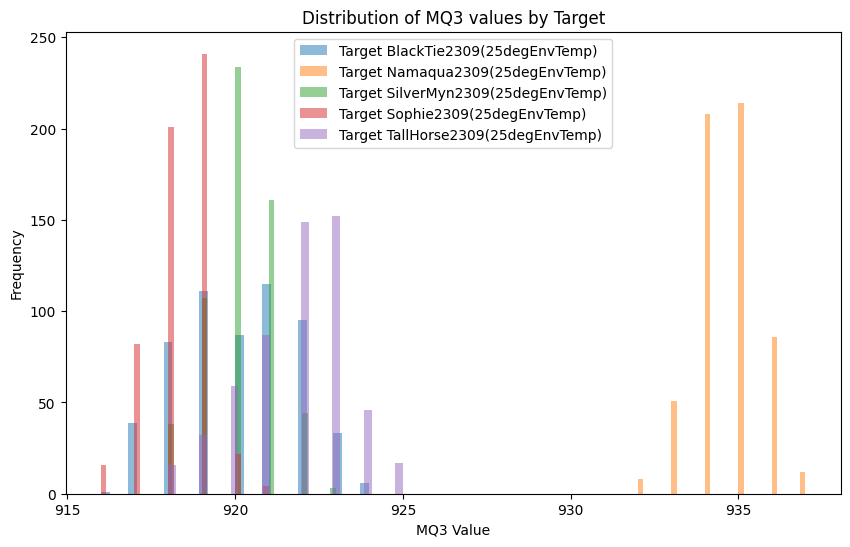

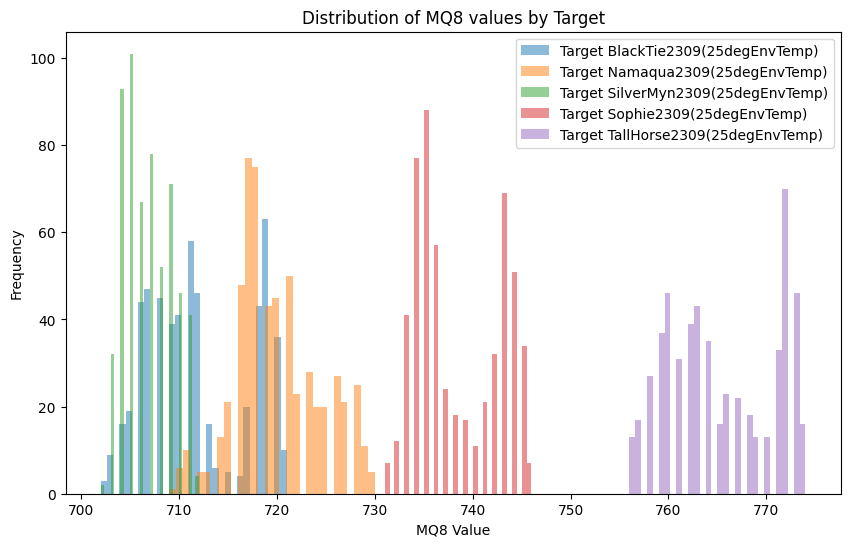

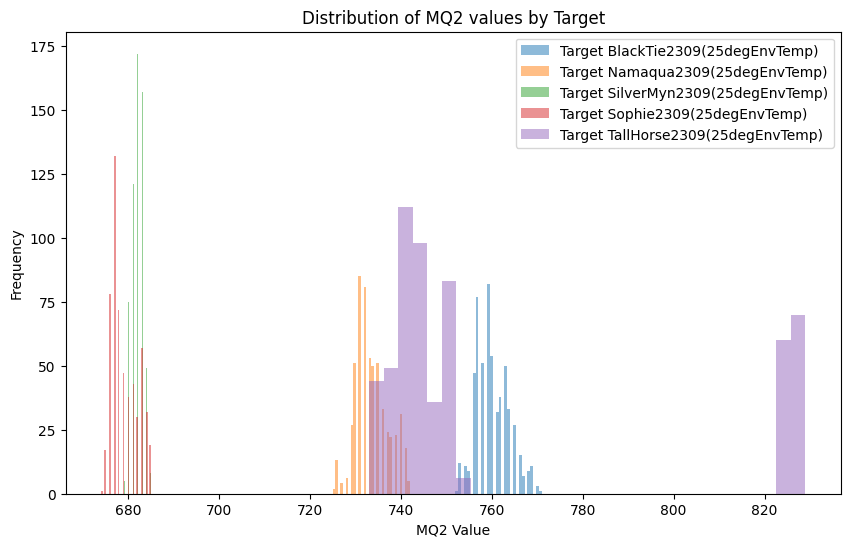

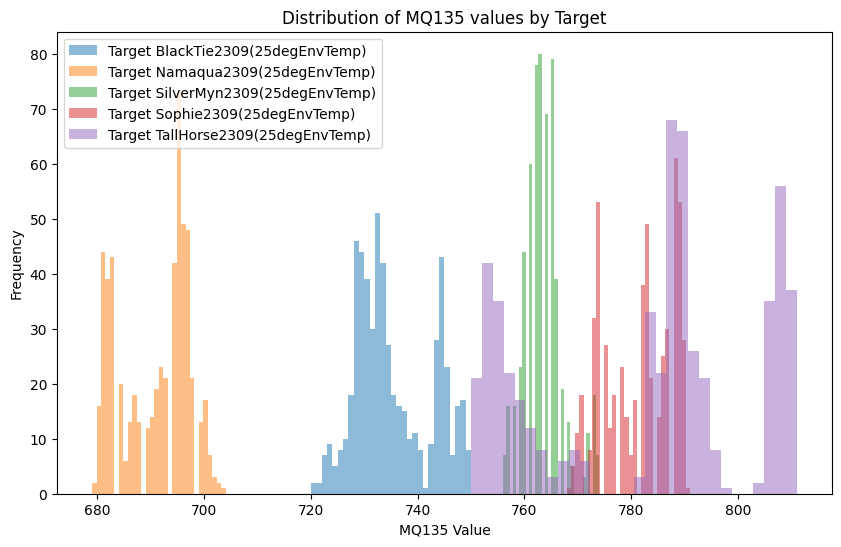

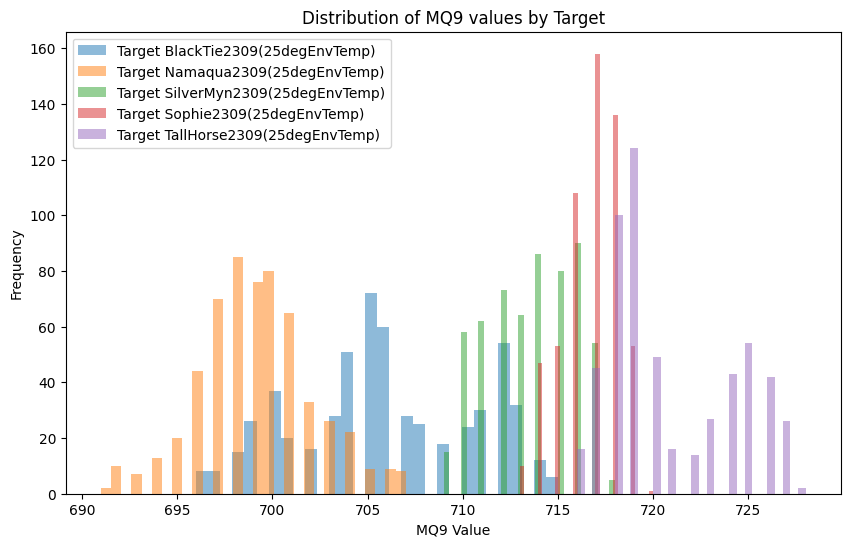

In [5]:
cleaner.plot_histograms(cleanedData)

In [6]:
dataToCluster = cleanedData.drop(columns=['yyyy-mm-dd timestamp','BMPTemperature','DHTTemperature','Humidity','Pressure(Pa)']
                          )  # Drop the timestamp column
        # Features excluding 'Target'

dataToCluster.head()

,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,Target
1,523,786,734,329,919.0,708,757,730,701,BlackTie2309(25degEnvTemp)
2,522,787,734,329,920.0,708,757,729,702,BlackTie2309(25degEnvTemp)
3,522,788,733,327,918.0,708,757,729,701,BlackTie2309(25degEnvTemp)
4,520,787,735,330,919.0,708,759,730,703,BlackTie2309(25degEnvTemp)
5,522,787,733,327,919.0,708,757,729,701,BlackTie2309(25degEnvTemp)


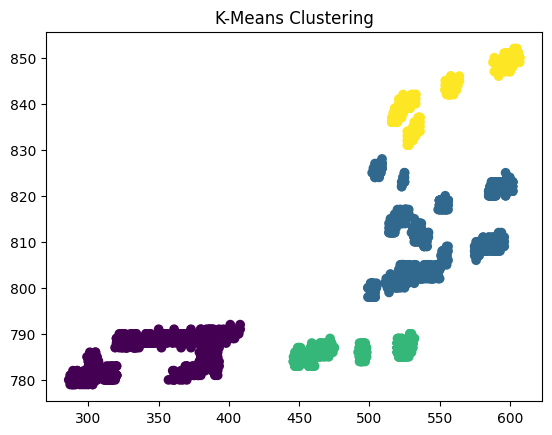

In [7]:
import numpy as np
from clustering import ClusteringTechniques  # Import your class from the file (if saved separately)

# Initialize the ClusteringTechniques class with your data
clustering = ClusteringTechniques(dataToCluster)

# Perform K-Means clustering
kmeans_labels = clustering.kmeans(n_clusters=4)

# Visualize the K-Means clustering result
clustering.visualize(kmeans_labels, "K-Means Clustering")

# Compare clustering results with actual wine types
results = clustering.evaluate_with_target(kmeans_labels)
# print(results)
# results.head()

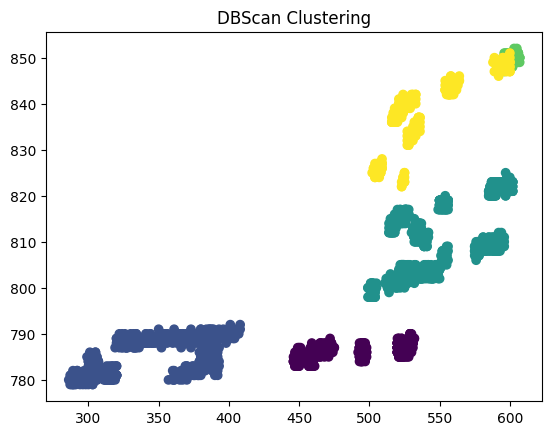

In [8]:
dbscan_labels = clustering.dbscan(eps=40, min_samples=10)

clustering.visualize(dbscan_labels, "DBScan Clustering")


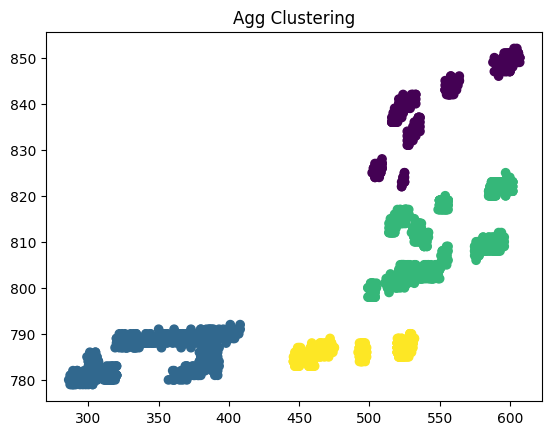

In [9]:
agglomerative_labels = clustering.agglomerative( n_clusters=4, linkage='average')

clustering.visualize(agglomerative_labels, "Agg Clustering")

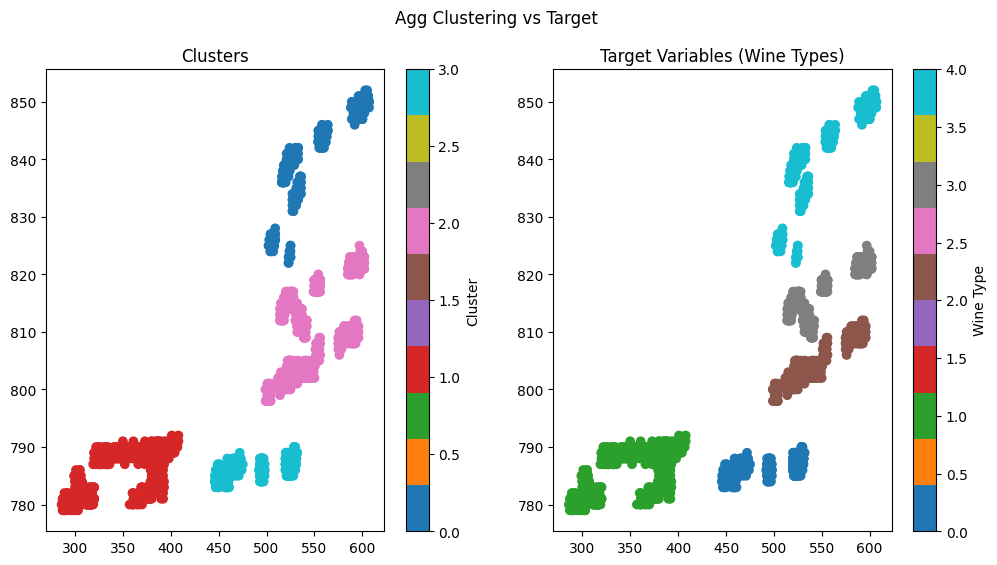

In [10]:
clustering.visualize_with_targets(agglomerative_labels, "Agg Clustering vs Target")

In [11]:
results = clustering.evaluate_with_target(kmeans_labels)
print(results)

results.to_csv("cluster_results_kmeans", index=False)

     Cluster                         Wine
1          2   BlackTie2309(25degEnvTemp)
2          2   BlackTie2309(25degEnvTemp)
3          2   BlackTie2309(25degEnvTemp)
4          2   BlackTie2309(25degEnvTemp)
5          2   BlackTie2309(25degEnvTemp)
..       ...                          ...
557        1  TallHorse2309(25degEnvTemp)
558        1  TallHorse2309(25degEnvTemp)
559        1  TallHorse2309(25degEnvTemp)
560        1  TallHorse2309(25degEnvTemp)
561        1  TallHorse2309(25degEnvTemp)

[2860 rows x 2 columns]


<Axes: >

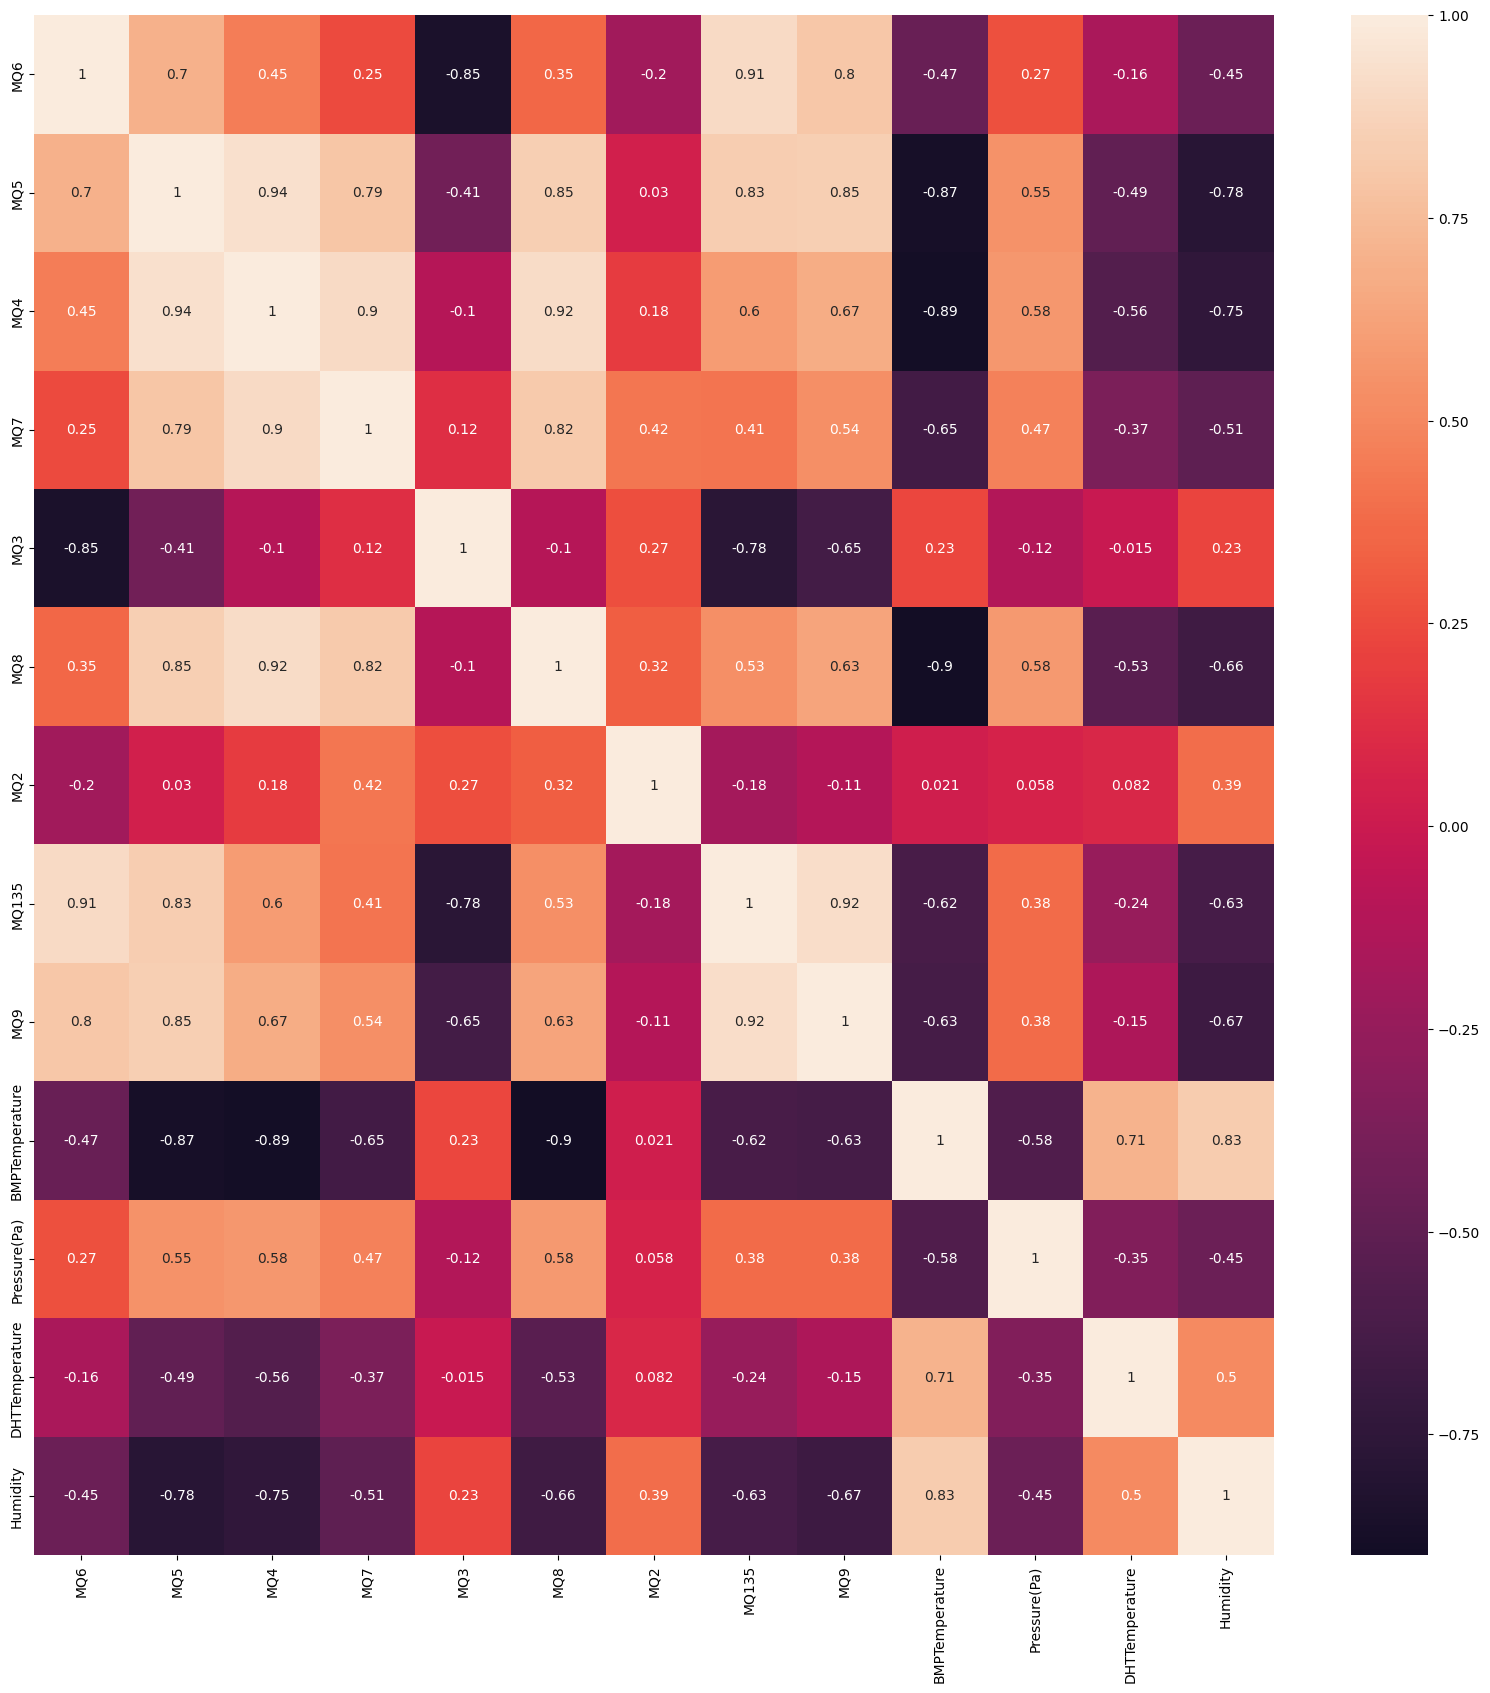

In [12]:
#correlation matrix

corrData = cleanedData.drop(columns=['yyyy-mm-dd timestamp','Target'])  # Drop the timestamp column

corrmat= corrData.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap="rocket", center=0)

<Axes: >

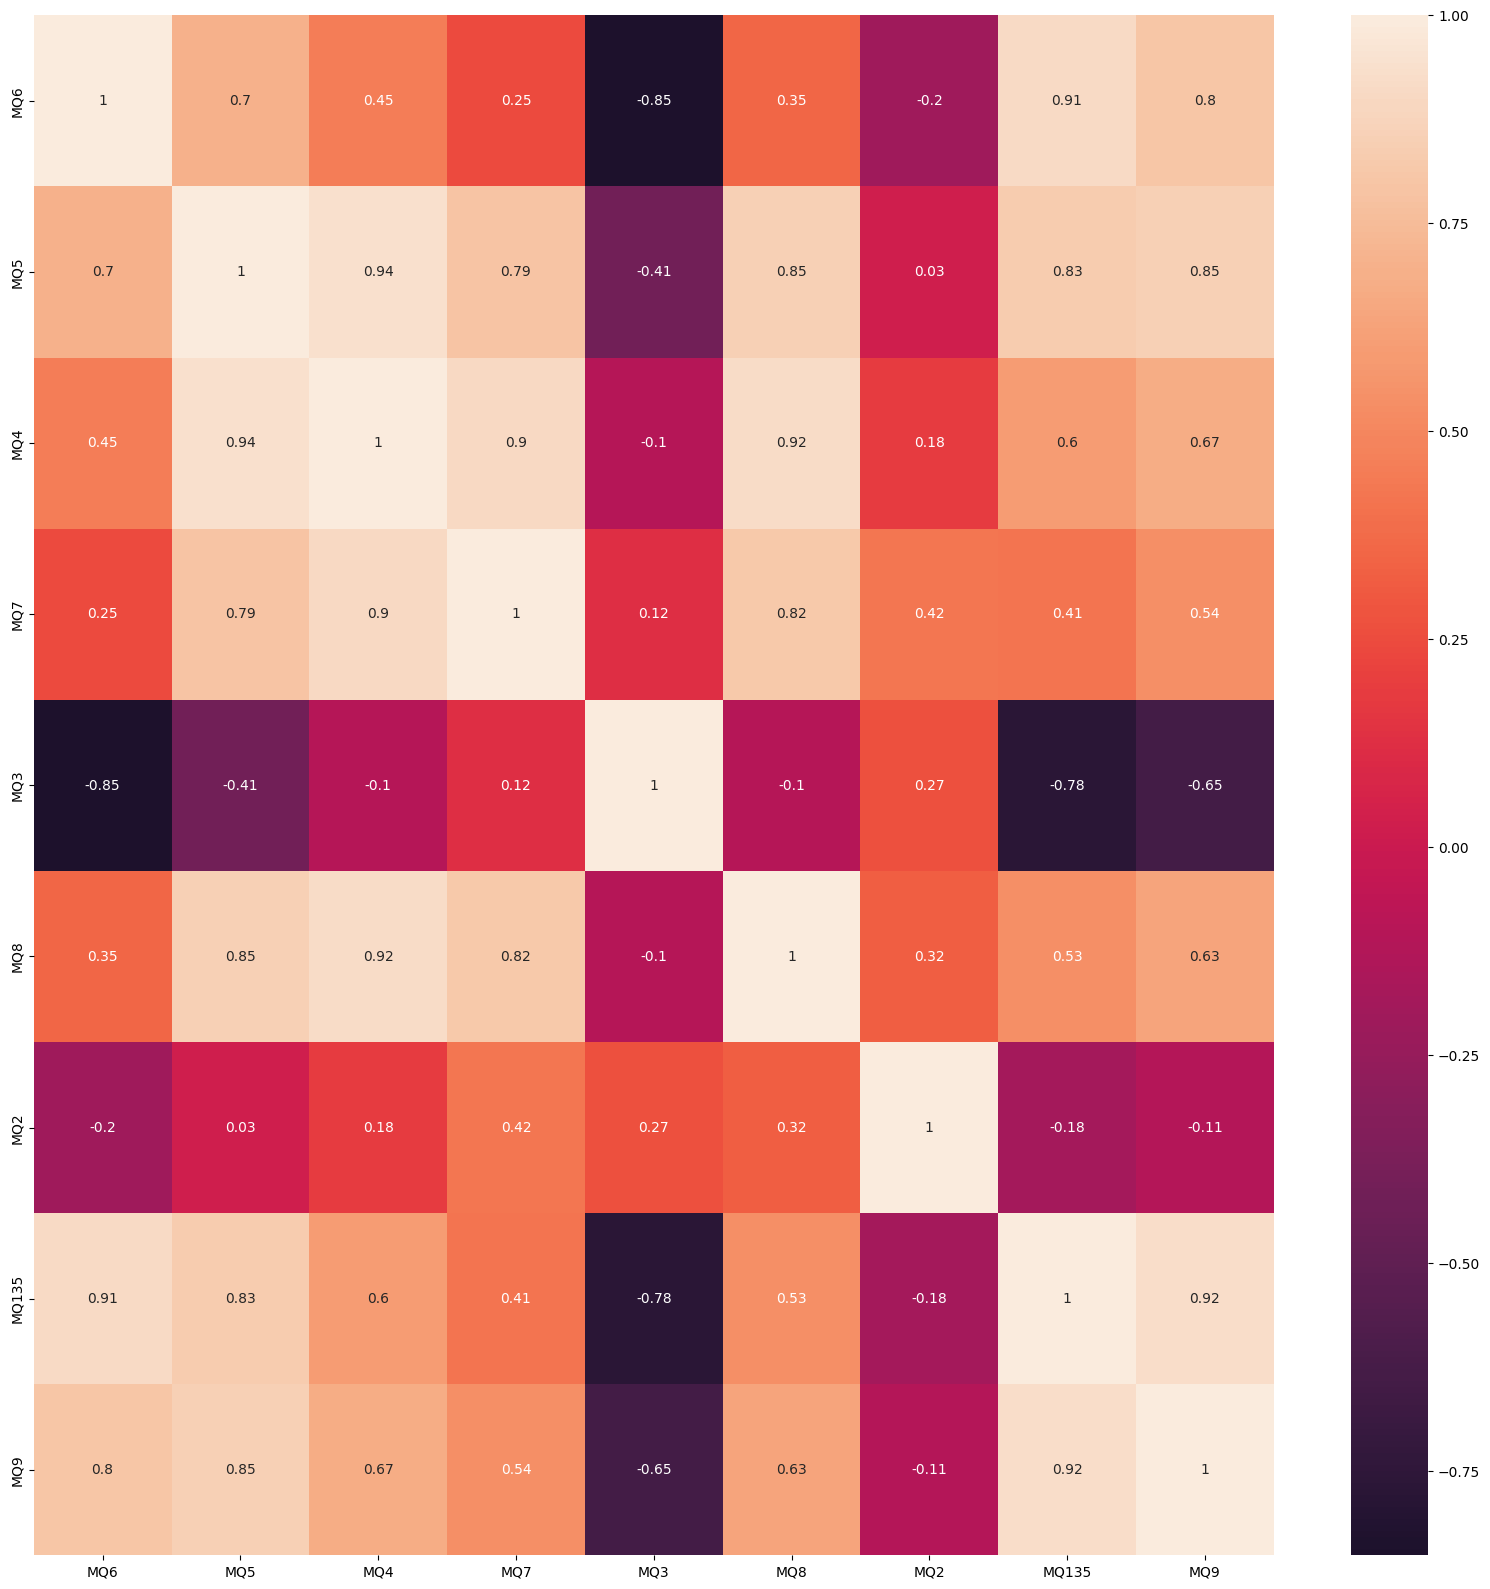

In [13]:
# drop temp pressure and humidity featers

corrData2 = cleanedData.drop(columns=['yyyy-mm-dd timestamp','BMPTemperature','DHTTemperature','Humidity','Pressure(Pa)', 'Target']
                          )  # Drop the timestamp column
        # Features excluding 'Target'

corrmat2 = corrData2.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat2,annot=True, cmap="rocket", center=0)

# Preprocess Data

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df = pd.DataFrame()

df = cleanedData.drop(columns=['yyyy-mm-dd timestamp', 'Target']
                          )  # Drop the timestamp column
        # Features excluding 'Target'

scaler.fit_transform(df)

scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )

print("All features are now scaled")

All features are now scaled


In [15]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_df.head()

Dataframe to be used for further modelling:


,MQ6,MQ5,MQ4,MQ7,MQ3,MQ8,MQ2,MQ135,MQ9,BMPTemperature,Pressure(Pa),DHTTemperature,Humidity
0,0.245748,-0.978909,-1.084317,-1.015572,-0.663042,-0.92679,0.853060,-0.563962,-1.214554,0.608780,-0.959681,-0.689193,1.908897
1,0.234302,-0.932180,-1.084317,-1.015572,-0.498476,-0.92679,0.853060,-0.591664,-1.095251,0.647033,-1.078327,-0.689193,1.908897
2,0.234302,-0.885450,-1.125113,-1.073154,-0.827609,-0.92679,0.853060,-0.591664,-1.214554,0.685286,-1.142837,-0.689193,1.908897
3,0.211409,-0.932180,-1.043521,-0.986781,-0.663042,-0.92679,0.903456,-0.563962,-0.975948,0.685286,-1.331351,-0.689193,1.908897
4,0.234302,-0.932180,-1.125113,-1.073154,-0.663042,-0.92679,0.853060,-0.591664,-1.214554,0.685286,-1.374051,-0.689193,1.908897


# PCA Analysis of 9 MQ Sensors and 4 Environmental Sensors

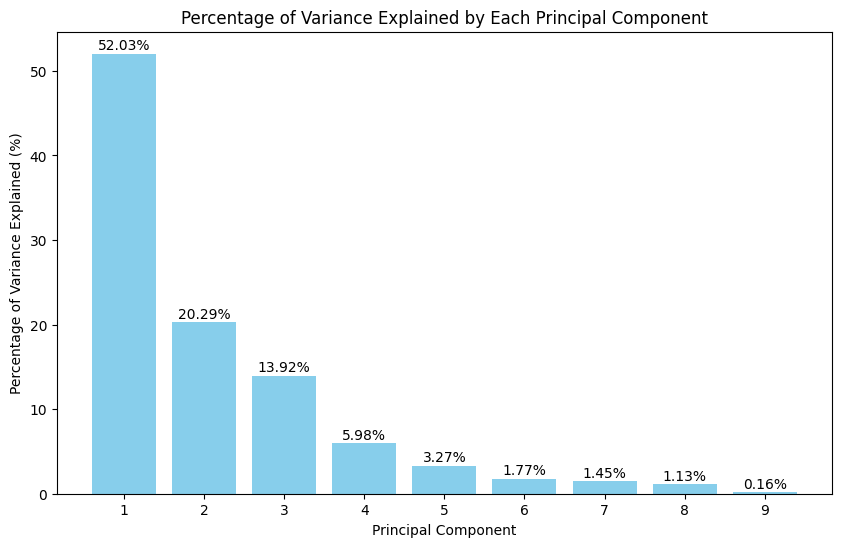

In [34]:
PCA_analysisData = cleanedData
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming PCA_analysisData is a DataFrame that contains the timestamp and sensor readings
# Remove the timestamp column (assuming it is named 'timestamp')
PCA_analysisData_numeric = PCA_analysisData.drop(columns=['yyyy-mm-dd timestamp', 'Target', 'BMPTemperature', 'Pressure(Pa)', 'DHTTemperature', 'Humidity'])

# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(PCA_analysisData_numeric)

# Apply PCA
pca = PCA()
pca.fit(data_scaled)

# Get explained variance ratio (percentage of variance explained by each component)
explained_variance = pca.explained_variance_ratio_

# Plot the variance explained by each component
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, color='skyblue')
plt.title('Percentage of Variance Explained by Each Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance Explained (%)')
plt.xticks(range(1, len(explained_variance) + 1))

# Add percentage labels on top of each bar
for i, v in enumerate(explained_variance * 100):
    plt.text(i + 1, v + 0.5, f"{v:.2f}%", ha='center')

plt.show()


# Dimensionality Reduction and Principal Component Analysis
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. Less dimensions or features make it easier for models to deal with. When dimensions correlate, we can reduce them.

In [17]:
from sklearn.decomposition import PCA

#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["col1","col2", "col3"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2860.0,3.180051e-16,2.720694,-3.599377,-2.541783,-0.797798,2.415604,7.037031
col2,2860.0,7.950129e-17,1.581481,-2.292793,-1.278270,-0.656155,1.592856,2.943541
col3,2860.0,-7.950129e-17,1.145893,-3.497736,-1.068434,0.032732,0.656919,2.709728


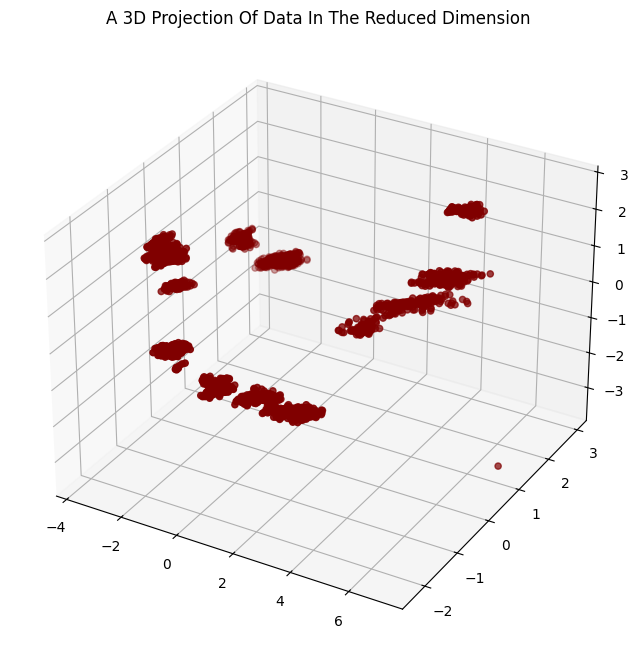

In [18]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["col1"]
y =PCA_df["col2"]
z =PCA_df["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

# Clustering

Performing clustering via Agglomerative clustering. Agglomerative clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

Steps involved in the Clustering

Elbow Method to determine the number of clusters to be formed
Clustering via Agglomerative Clustering
Examining the clusters formed via scatter plot


In [19]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

ModuleNotFoundError: No module named 'yellowbrick'

The above cell indicates that four will be an optimal number of clusters for this data. Next, we will be fitting the Agglomerative Clustering Model to get the final clusters.

In [39]:
from sklearn.cluster import AgglomerativeClustering

#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.

data = cleanedData
data["Clusters"]= yhat_AC

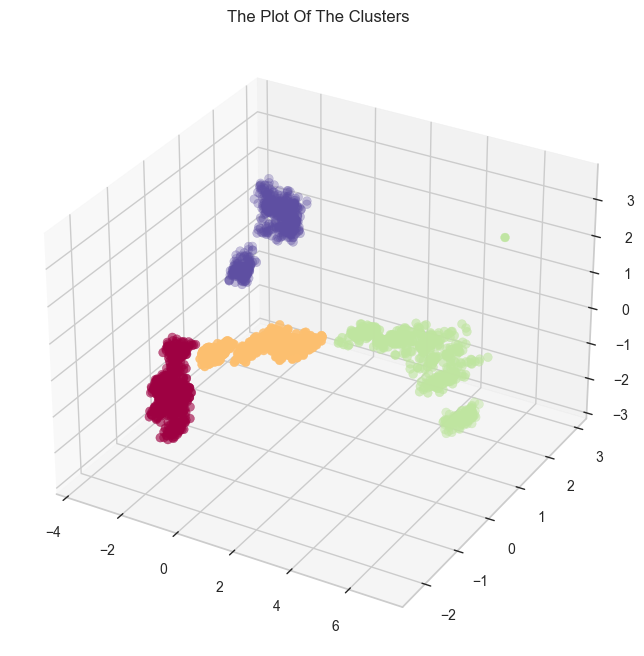

In [41]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = "Spectral" )
ax.set_title("The Plot Of The Clusters")
plt.show()